In [1]:
using Pkg
Pkg.activate("..")

  Activating environment at `~/Documents/repos/juDataNSOM/Project.toml`


In [2]:
using DataAnNSOM 
using LinearAlgebra,Measures,LaTeXStrings,Plots

In [3]:
mo,dy,yr = 10,14,22; fi=2
nEl = 5
data,datAmp,datFase = DataAnNSOM.read_FileData(mo,dy,yr,fi);
cm =cgrad([:red, :blue]);
cmAFM=:afmhot; cmNSOM=:viridis;

In [4]:
ImAFM,ImNSOM,ImMult = DataAnNSOM.getDataExp(data);

In [5]:
labelNSOM = L"NSOM~[UA]"

ImagNSOMnoise = DataAnNSOM.plotImag(mo,dy,yr,ImNSOM,cmNSOM, labelNSOM,5,fi)
ImagNSOMnoise = title!("Imagen NSOM");
#p1 = hline!([1,1], c = :red, label=:none)
ProfNSOMnoise = DataAnNSOM.plotProfile(mo,dy,yr,ImNSOM, labelNSOM,5,1,fi);
ProfNSOMnoise = title!("Perfil NSOM");

# ==================================================================================================
# imagen filtrada
n0,nct = 20,4
opt,order = "GH",4
datFiltrNSOM = DataAnNSOM.getFiltImag1(ImNSOM,n0,nct,opt,order);
datFiltrNSOM = -datFiltrNSOM
ImagNSOMFiltr = DataAnNSOM.plotImag(mo,dy,yr,datFiltrNSOM,cmNSOM, labelNSOM,5,fi)
ImagNSOMFiltr = title!("Imagen filtrada")
ProfNSOMFiltr = DataAnNSOM.plotProfile(mo,dy,yr,datFiltrNSOM, labelNSOM,5,1,fi)
ProfNSOMFiltr = title!("perfil filtrado");

compImNSOM = plot(ImagNSOMnoise,ImagNSOMFiltr, size=(1000,400));

In [6]:
labelAFM = L"Distancia~[\mu m]"

ImagAFMnoise = DataAnNSOM.plotImag(mo,dy,yr,ImAFM,cmAFM, labelAFM,5,fi)
ImagAFMnoise = title!("Imagen SFM");
#p1 = hline!([1,1], c = :red, label=:none)
ProfAFMnoise = DataAnNSOM.plotProfile(mo,dy,yr,ImAFM, labelAFM,5,1,fi);
ProfAFMnoise = title!("Perfil SFM");

# ==================================================================================================
# imagen corregida

λ,ratio = 200,1e-6
itrM = 100

ImAFMwB = DataAnNSOM.getImagewoB(λ,ratio,itrM,ImAFM)
labelD = L"Altura~[\mu m]" 
ImagAFMwB = DataAnNSOM.plotImag(mo,dy,yr,ImAFMwB,cmAFM, labelD,5,fi)
ImagAFMwB = title!("Imagen SFM con correccion")
ProfAFMwB = p2 = DataAnNSOM.plotProfile(mo,dy,yr,ImAFMwB, labelD,5,1,fi)
ProfAFMwB = title!("Perfil SFM con correccion")


# ==================================================================================================
# imagen filtrada
n0,nct = 0,8
opt,order = "GH",4
datFiltrAFM = DataAnNSOM.getFiltImag1(ImAFMwB,n0,nct,opt,order);

ImagAFMFiltr = DataAnNSOM.plotImag(mo,dy,yr,datFiltrAFM,cmAFM, labelAFM,5,fi)
ImagAFMFiltr = title!("Imagen filtrada")
ProfAFMFiltr = DataAnNSOM.plotProfile(mo,dy,yr,datFiltrAFM, labelAFM,5,1,fi)
ProfAFMFiltr = title!("perfil filtrado");

compImAFM = plot(ImagAFMFiltr,ProfAFMFiltr, size=(1000,400));

In [7]:
ϕ,θ = 30,30

Im3DAFM = DataAnNSOM.plot3Ddata(mo,dy,yr,fi,ImAFMwB,nEl,cmAFM,labelD,ϕ,θ)
Im3DAFM =title!("AFM")

Im3DNSOM = DataAnNSOM.plot3Ddata(mo,dy,yr,fi,datFiltrNSOM,nEl,cmNSOM,labelNSOM,ϕ,θ)
Im3DNSOM =title!("NSOM");


In [8]:
comp2D = plot(ImagAFMwB,ImagNSOMFiltr, size = (1000,445))
Comp3D = plot(Im3DAFM,Im3DNSOM, size = (1000,445));
#plot(comp2D,Comp3D, layout=(2,1),size = (900,845))

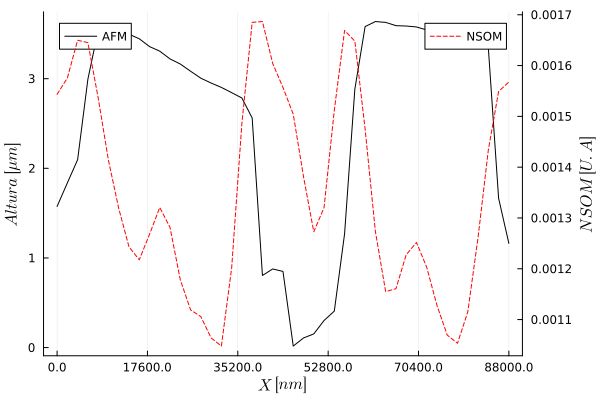

In [9]:
i = 1
dat2,dat1 = ImAFMwB[i,:],datFiltrNSOM[i,:]; 
label1,label2=L"Altura~[\mu m]",L"NSOM~[U.A]"
DataAnNSOM.PlotCompProfiles(mo,dy,yr,fi,dat1,dat2,label1,label2,5)

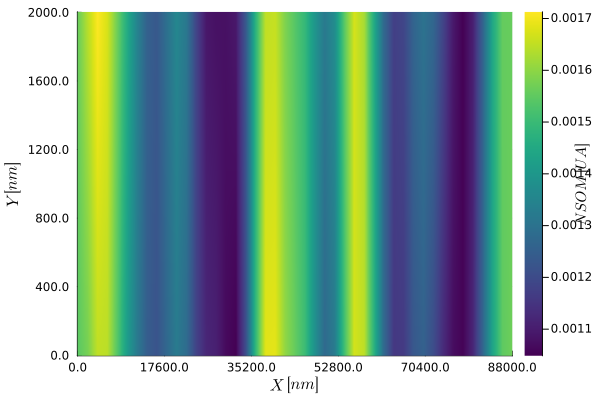

In [10]:
drr = ImNSOM./(-ImMult)
DataAnNSOM.plotImag(mo,dy,yr,datFiltrNSOM,cmNSOM, labelNSOM,5,fi)